# **K-Means clustering on cyclist dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry_convert as pc
import os
import scipy.stats as stats
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

%matplotlib inline

The dataset is used after it has undergone the phases of cleaning, feature engineering, and outlier detection.

In [2]:
cyclists_df = pd.read_csv('../dataset/cyclists_outlier.csv')

All columns present after cleaning, feature engineering, and outlier detection 

In [3]:
cyclists_df.columns

Index(['_url', 'name', 'birth_year', 'nationality', 'cyclist_experience',
       'cyclist_experience_points', 'cyclist_win', 'cyclist_win_ratio',
       'avg_relative_position', 'relative_position_std',
       'mean_last_20_positions', 'mean_last_20_positions_1',
       'min_relative_position', 'avg_position_vs_startlist',
       'performance_entropy', 'weighted_podiums', 'career_level',
       'avg_position', 'best_position', 'best_position_std', 'mean_sq',
       'top_experience', 'continent', 'top_cyclists'],
      dtype='object')

## **CLUSTER 1:**
feature used: 
- `avg_relative_position`
- `career_level`
- `mean_sq`

### **Preprocessing**

Only numerical features are kept for k-means

In [4]:
# After many attempts and tests, these are the features that delivered better results than we expected.
columns_to_keep = ["avg_relative_position", "mean_sq", "career_level"]

In [5]:
numeric_cyclists_df = cyclists_df[cyclists_df[columns_to_keep].select_dtypes(include=[np.number]).columns]
numeric_cyclists_df

,avg_relative_position,mean_sq,career_level
0,0.004726,1615.878378,14371.866873
1,0.010415,775.122449,1514.222579
2,0.007259,1052.086957,8115.442081
3,0.009004,784.895833,1673.263534
4,0.008623,972.963542,11460.308567
...,...,...,...
3471,0.005587,1021.305648,13654.562144
3472,0.007723,863.183673,2179.182843
3473,0.006247,1164.818182,858.492493
3474,0.012301,676.653846,787.168167


Standardize cyclists_df by scaling each feature to have a mean of 0 and a standard deviation of 1.

In [6]:
scaler = StandardScaler()
scaler.fit(numeric_cyclists_df)
scaled_cyclists = scaler.transform(numeric_cyclists_df)

### **Best K parameter search**

In [7]:
k_grid = range(2, 21)

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(scaled_cyclists)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels
    
    print(f'for k = {k}')
    print('SSE %s' % sse)
    current_bouldin = davies_bouldin_score(scaled_cyclists, labels)
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    current_silhouette = silhouette_score(scaled_cyclists, labels)
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)
    

for k = 2
SSE 6268.848303454
Separation 1.1103622897281886
Silhouette 0.364708086200975
for k = 3
SSE 4468.242184250852
Separation 0.9328361359774835
Silhouette 0.4057714944292995
for k = 4
SSE 3291.496273320434
Separation 0.9623511308561379
Silhouette 0.3398340054616037
for k = 5
SSE 2842.95033373537
Separation 1.0663505671647313
Silhouette 0.3151081977366537
for k = 6
SSE 2468.272897454148
Separation 1.0326419403657139
Silhouette 0.30032535295603563
for k = 7
SSE 2173.8103114822884
Separation 1.0501335189546392
Silhouette 0.2941587886986238
for k = 8
SSE 1970.7440045054032
Separation 1.0332720711619126
Silhouette 0.2896901127124613
for k = 9
SSE 1792.8567025723996
Separation 0.977562332040255
Silhouette 0.2979079559214029
for k = 10
SSE 1663.4320203662762
Separation 0.9990424878264206
Silhouette 0.2854574836910443
for k = 11
SSE 1552.6087680947503
Separation 0.9984000030297043
Silhouette 0.27806588529584897
for k = 12
SSE 1457.047462575248
Separation 0.9998469181161883
Silhouette 0.2

#### **SSE plot**

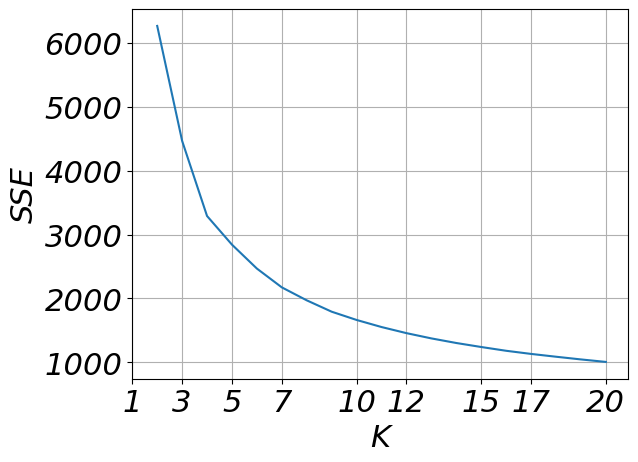

In [8]:
sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()


For K=3, appears to be the first point at which the rate of decrease in the curve decreases

#### **Silhouette**

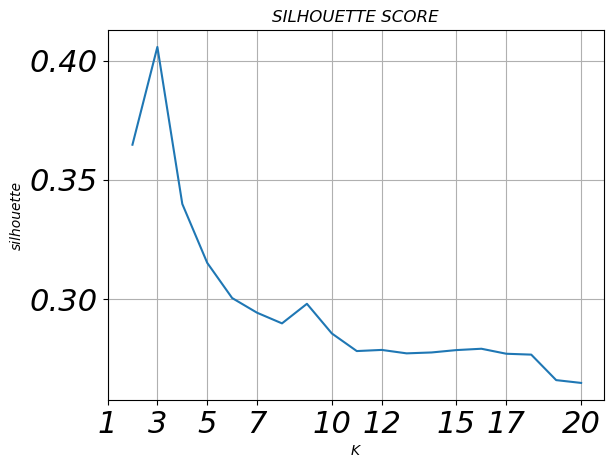

In [9]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

Silhouette reaches a maximum value near to k=3

#### **Dvies-Bouldin**

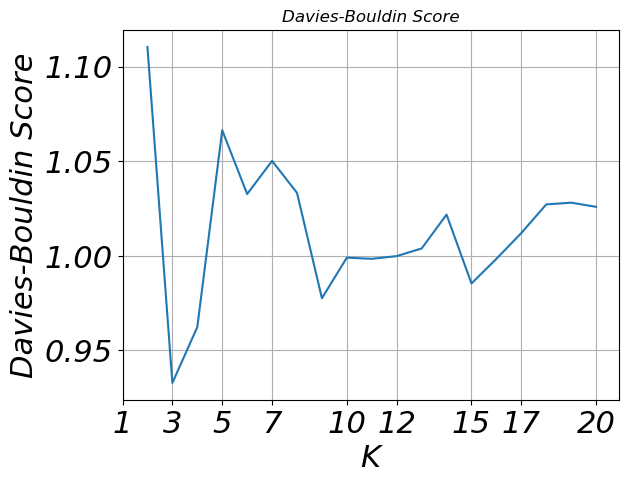

In [10]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

In this case the best value is with k=3 

In [11]:
k = 3
sse = dict_kmeans[f'{k}_sse']
silhouette = dict_kmeans[f'{k}_silhouette_score']
davies_bouldin = dict_kmeans[f'{k}_bouldin_score']

print(f'SSE for k={k}: {sse}')
print(f'Silhouette Score for k={k}: {silhouette}')
print(f'Davies-Bouldin Score for k={k}: {davies_bouldin}')

SSE for k=3: 4468.242184250852
Silhouette Score for k=3: 0.4057714944292995
Davies-Bouldin Score for k=3: 0.9328361359774835


#### **Best k conclusion:**<br>
Considering the three metrics, the value of K=3 emerges as the best choice, as it represents a compromise that aligns well with all the evaluated metrics. 

### **K-means resuslts** 


Considering the three metrics, the value of K=3 emerges as the best choice, as it represents a compromise that aligns well with all the evaluated metrics.

In [11]:
# RETRAIN BEST K-MEANS
best_k = 3
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=100)
best_kmeans.fit(scaled_cyclists)

KMeans(max_iter=100, n_clusters=3, random_state=0)

#### **PCA**

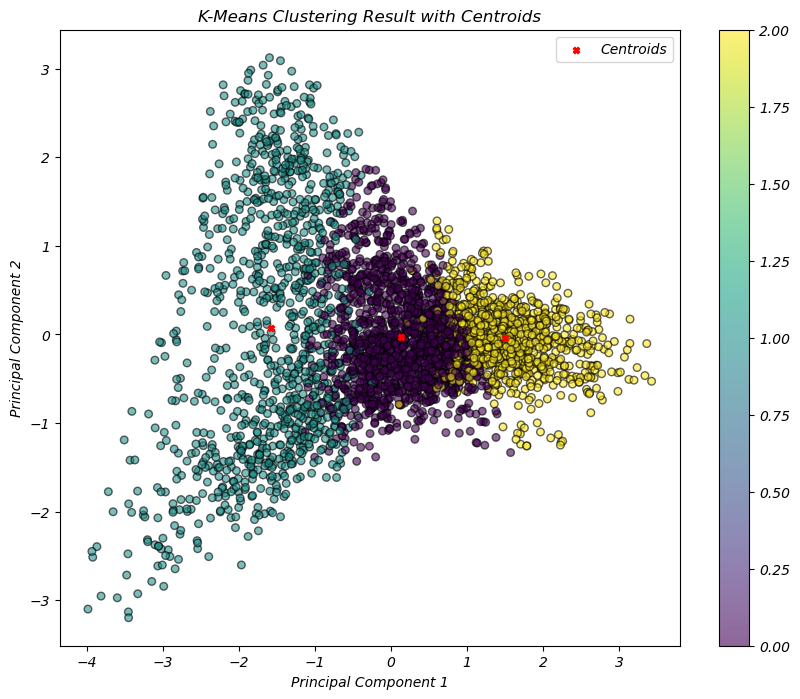

In [12]:
# Reduce the dimensionality of the data to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_cyclists)

# Plot the centroids in 2D
centroids_pca = pca.transform(best_kmeans.cluster_centers_)

plt.figure(figsize=(10, 8))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=30, alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=20, label='Centroids')
plt.title('K-Means Clustering Result with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(sc)
plt.legend()
plt.show()

In [13]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [1434, 1055, 987]


#### **Pair plot**

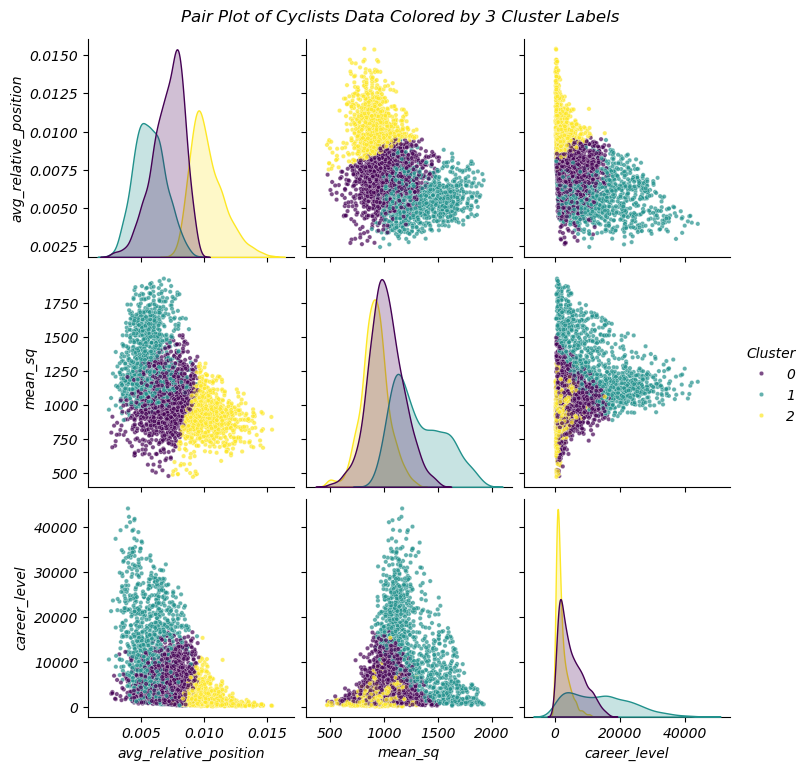

In [14]:
# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

cyclists_df = cyclists_df.assign(Cluster=labels_series.values)
numeric_cyclists_df = numeric_cyclists_df.assign(Cluster=labels_series.values)

# Pair plot colored by cluster labels with smaller markers
sns.pairplot(numeric_cyclists_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis', markers='o', plot_kws={'s': 10, 'alpha': 0.7})
plt.suptitle(f'Pair Plot of Cyclists Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()



#### **Similarity Plot**

In [15]:
print(cyclists_df.columns)

Index(['_url', 'name', 'birth_year', 'nationality', 'cyclist_experience',
       'cyclist_experience_points', 'cyclist_win', 'cyclist_win_ratio',
       'avg_relative_position', 'relative_position_std',
       'mean_last_20_positions', 'mean_last_20_positions_1',
       'min_relative_position', 'avg_position_vs_startlist',
       'performance_entropy', 'weighted_podiums', 'career_level',
       'avg_position', 'best_position', 'best_position_std', 'mean_sq',
       'top_experience', 'continent', 'top_cyclists', 'Cluster'],
      dtype='object')


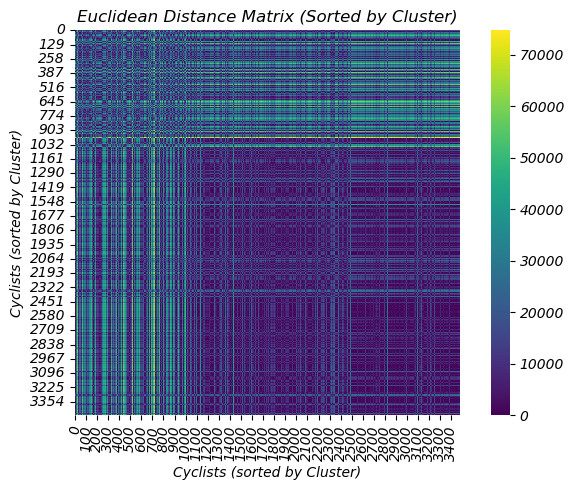

In [16]:
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# order the dataframe based on the cluster
cyclists_df['Cluster'] = pd.Categorical(cyclists_df['Cluster'], categories=[1, 0, 2], ordered=True)
cyclists_df_sorted = cyclists_df.sort_values(by='Cluster')

# calculate the euclidean distance matrix excluding the cluster value
features = cyclists_df_sorted.drop(columns=['Cluster']).select_dtypes(include=[np.number])
distance_matrix = euclidean_distances(features)

# visualize the distance matrix
plt.figure(figsize=(8, 5))
sns.heatmap(distance_matrix, cmap='viridis', square=True)
plt.title('Euclidean Distance Matrix (Sorted by Cluster)')
plt.xlabel('Cyclists (sorted by Cluster)')
plt.ylabel('Cyclists (sorted by Cluster)')
plt.show()


#### **Pie chart**

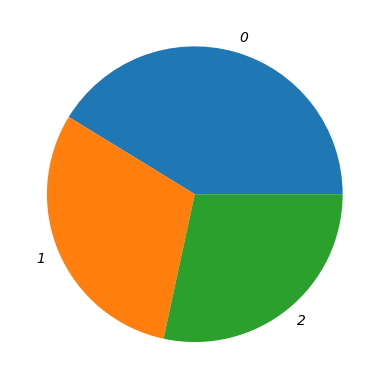

In [17]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

#### **Radar Plot**

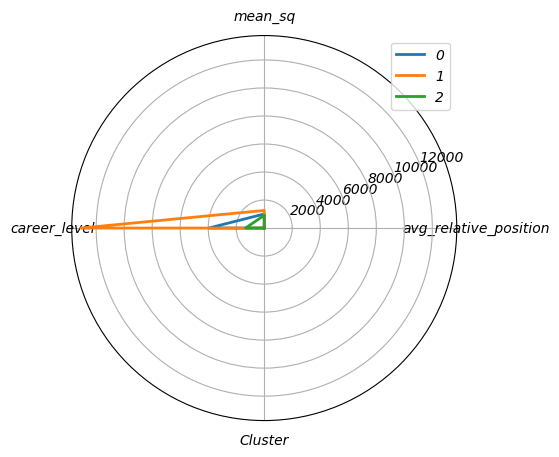

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(numeric_cyclists_df.columns)
plt.figure(figsize=(5, 5))

for k in range(0, n_clusters):
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
     
    values = numeric_cyclists_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], numeric_cyclists_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()

### **Cluster characterization**


#### **Characterization based on** ```top_cyclists```

This plot shows, for each cluster, the number of cyclists belonging to that cluster who have a specific value for the feature "top_cyclist." This feature was created based on the "career_level" score: cyclists were ranked according to this score, and then different classes were created based on their position, such as top_20, top_50, and so on. <br>

Initially, using these features for clustering, we expected a clear characterization based on career level, as the cluster is built on features related to a cyclist's performance throughout their career. Career level is determined by the positions achieved in races, weighted by points and the number of cyclists. From the pair plots, we could already notice that it doesn't behave exactly as expected. Now, we will show some more detailed plots to confirm that the feature career level does not perform as anticipated.

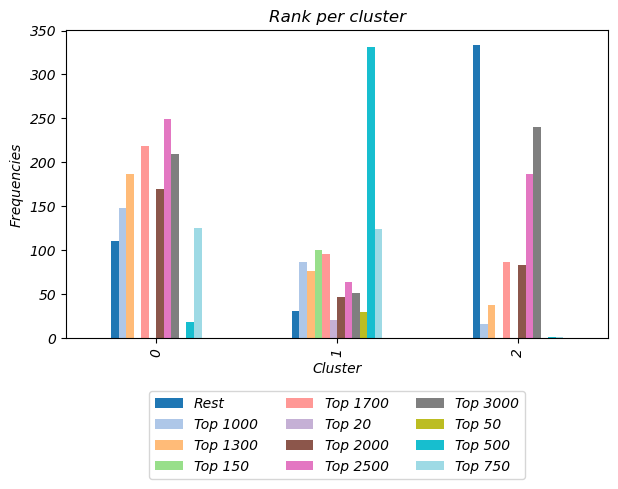

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, cyclists_df['top_cyclists'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()


The plot didn’t turn out as we expected. In fact, the clusters are not clearly separated based on *career level*.

- **Cluster 1**: Represents cyclists with a relatively higher *career level*. This is the only cluster that includes top 20, top 50 and top 150 cyclists career level.  

- **Cluster 0**: Corresponds to intermediate cyclists. Compared to Cluster 2, it includes some top 500 and 750 cyclists, which are absent in Cluster 2.  

- **Cluster 2**: Contains cyclists with the lowest *career level*. This is evident from the significant presence of the "rest" category, meaning those with the lowest rankings.

As mentioned, this characterization isn’t entirely accurate. Upon reviewing the process, this makes sense because the clusters are based on a combination of features: *career level*, *average position*, and *startlist quality*. 

The clustering “level” found by K-means is therefore a combination of these three features, not just *career level*. Consequently, it’s reasonable that the clusters aren’t perfectly characterized by *career level* alone.


**More precise visualization** <br>

Starting with the graph shown above, we now perform the same analysis, but with a division into classes based on the clustering results. The first class (representing the strongest cyclists) should include the top 1055 cyclists based on career level. The second class (intermediate cyclists) includes cyclists ranked from position 1055 to 2489 (the next 1434 cyclists). Finally, the remaining cyclists from position 1294 onward form the third class.

In [20]:
# Sort the cyclists_df DataFrame by the 'career_level' column in descending order
sorted_cyclists_df = cyclists_df.sort_values(by='career_level', ascending=False)

# Define the bins and labels
[1434, 1055, 987]

bins = [0, 1055, 2489, 3476]
labels = ['top '+ str(bins[1]), 'top '+ str(bins[2]), 'top '+ str(bins[3])]

# Create a new column 'career_level_category' based on the bins
sorted_cyclists_df['top_cyclists2'] = pd.cut(range(1, len(sorted_cyclists_df) + 1), bins=bins, labels=labels, right=False)


# Add the 'top_cyclists' column to the original cyclists_df
cyclists_df = cyclists_df.merge(sorted_cyclists_df[['_url', 'top_cyclists2']], on='_url', how='left')

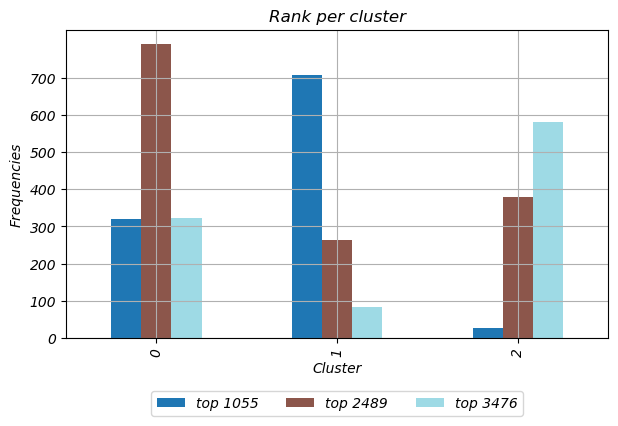

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, cyclists_df['top_cyclists2'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Aggiungere più intervalli sull'asse y
ax.set_yticks(range(0, rank_xt_pct.values.max() + 1, 100))

# Aggiungere la griglia 
ax.grid(True)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()


Ideally, we would expect to see a single blue bar for cluster 2, a single brown bar for cluster 1, and a single light blue bar for cluster 0.

#### **Parallel Coordinates Plot for Centroids**

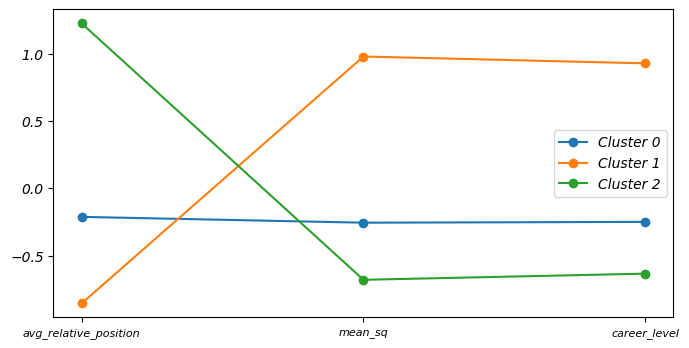

In [22]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8, 4))
centers = best_kmeans.cluster_centers_
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(columns_to_keep)), columns_to_keep, fontsize=8)
plt.legend(fontsize=10)
plt.show()

As confirmed by the observations made during the characterization based on cyclist levels, we can define the clusters as follows:  
- Cluster 0: **Intermediate Cyclists**
- Cluster 1: **Best Cyclists**
- Cluster 2: **Worst Cyclists**

The cyclists in the best group have a low average relative position (meaning they often finish among the top), high startlist quality, and a high career level. On the other hand, cyclists in the worst group show the opposite values. Those in the intermediate group fall somewhere in between.

**OBS:** This initial assumption will later be discussed and supported through upcoming characterization studies 

In [23]:
cluster_labels = {0: 'Intermediate Cyclists', 1: 'Best Cyclists', 2: 'Worst Cyclists'}

In [24]:
# filter the dataframe for each cluster value
cyclists_1_df = cyclists_df[cyclists_df['Cluster'] == 1]
cyclist_0_df = cyclists_df[cyclists_df['Cluster'] == 0]
clists_2_df = cyclists_df[cyclists_df['Cluster'] == 2]

#### **Analysis on the feature used for clustering** ```avg_relative_position```, ```career_level```, ```mean_sq```

In [25]:
# --- AVG RELATIVE POSITION ---

mean_avg_relative_position_per_cluster = cyclists_df.groupby('Cluster')['avg_relative_position'].mean()

# Print the mean avg_relative_position for each cluster with custom labels
for cluster, mean_avg_relative_position in mean_avg_relative_position_per_cluster.items():
    print(f'{cluster_labels[cluster]}: Mean Avg Relative Position = {mean_avg_relative_position}')

Best Cyclists: Mean Avg Relative Position = 0.005703328834281108
Intermediate Cyclists: Mean Avg Relative Position = 0.007113862148495687
Worst Cyclists: Mean Avg Relative Position = 0.010274329916292074


C:\Users\franc\AppData\Local\Temp\ipykernel_6968\3658375086.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_avg_relative_position_per_cluster = cyclists_df.groupby('Cluster')['avg_relative_position'].mean()


In [26]:
# --- CAREER LEVEL ---

mean_wins_per_cluster = cyclists_df.groupby('Cluster')['career_level'].mean()
# Print the mean number of cyclist wins for each cluster with custom labels
for cluster, mean_wins in mean_wins_per_cluster.items():
    print(f'Cluster {cluster_labels[cluster]}: Mean Cyclist career level = {mean_wins}')

Cluster Best Cyclists: Mean Cyclist career level = 13845.895090775204
Cluster Intermediate Cyclists: Mean Cyclist career level = 4990.8445982347175
Cluster Worst Cyclists: Mean Cyclist career level = 2094.002010885317


C:\Users\franc\AppData\Local\Temp\ipykernel_6968\3949613612.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_wins_per_cluster = cyclists_df.groupby('Cluster')['career_level'].mean()


In [27]:
# --- MEAN SQ ---

mean_wins_per_cluster = cyclists_df.groupby('Cluster')['mean_sq'].mean()
# Print the mean number of cyclist wins for each cluster with custom labels
for cluster, mean_wins in mean_wins_per_cluster.items():
    print(f'Cluster {cluster_labels[cluster]}: Mean Cyclist startlist quality = {mean_wins}')

Cluster Best Cyclists: Mean Cyclist startlist quality = 1315.893400713084
Cluster Intermediate Cyclists: Mean Cyclist startlist quality = 1014.2959178423135
Cluster Worst Cyclists: Mean Cyclist startlist quality = 910.020076505191


C:\Users\franc\AppData\Local\Temp\ipykernel_6968\1875270683.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_wins_per_cluster = cyclists_df.groupby('Cluster')['mean_sq'].mean()


As expected, for all three features, the average values are better for the stronger clusters and worse for the weaker ones.

#### **Characterization based on** ```weighted_podiums```

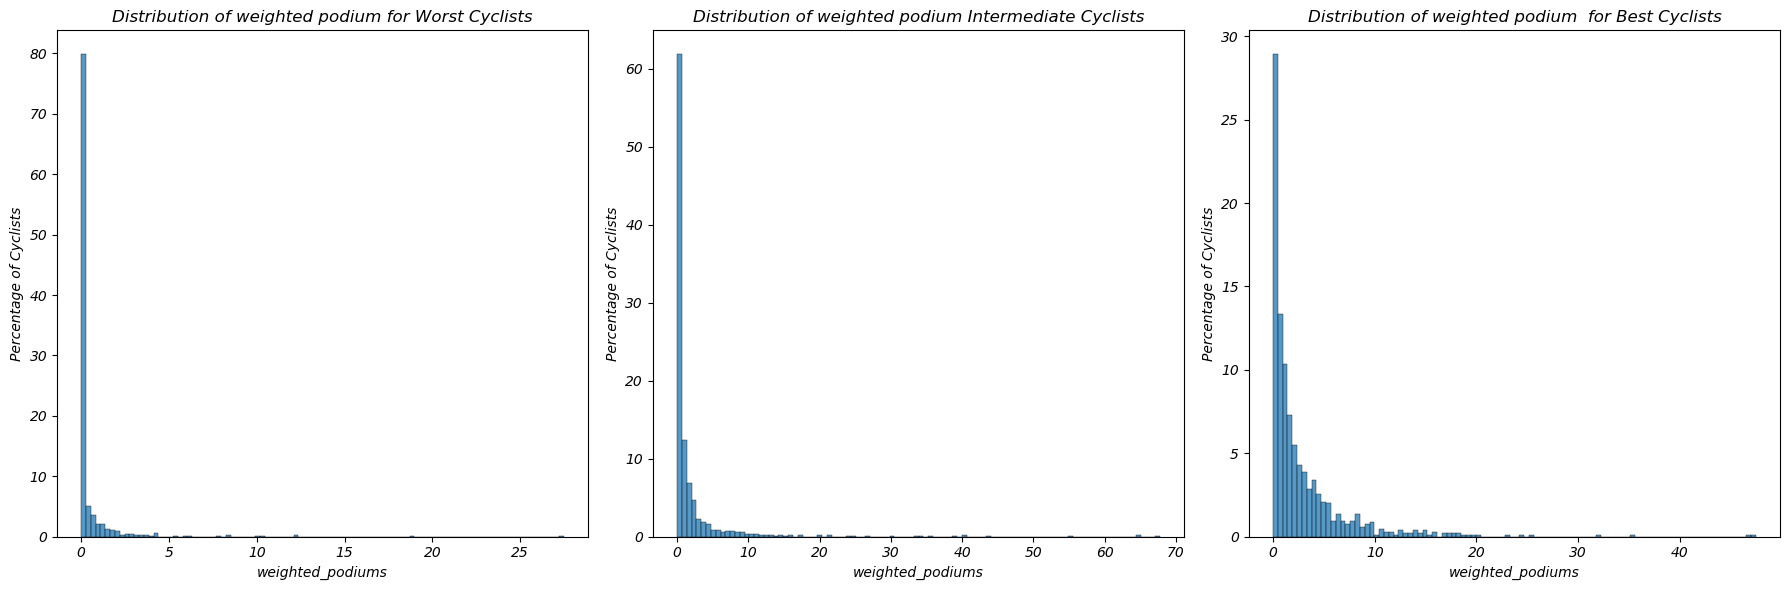

In [28]:
# Plot the distribution of stages won for all clusters
plt.figure(figsize=(18, 6))

# Plot for worst cyclists
plt.subplot(1, 3, 1)
sns.histplot(clists_2_df['weighted_podiums'], bins=100, stat='percent')
plt.title('Distribution of weighted podium for Worst Cyclists')
plt.xlabel('weighted_podiums')
plt.ylabel('Percentage of Cyclists')

# Plot for intermediate cyclists
plt.subplot(1, 3, 2)
sns.histplot(cyclist_0_df['weighted_podiums'], bins=100, stat='percent')
plt.title('Distribution of weighted podium Intermediate Cyclists')
plt.xlabel('weighted_podiums')
plt.ylabel('Percentage of Cyclists')

# Plot for best cyclists
plt.subplot(1, 3, 3)
sns.histplot(cyclists_1_df['weighted_podiums'], bins=100, stat='percent')
plt.title('Distribution of weighted podium  for Best Cyclists')
plt.xlabel('weighted_podiums')
plt.ylabel('Percentage of Cyclists')

plt.tight_layout()
plt.show()

In the first graph, we can see that a very large number of cyclists exhibit this characteristic at 0, and then quickly drop to 0 after a very small increase in the number of podium_weights.
In contrast, in the second and third graphs (showing higher ranked cyclists), a similar trend can be seen, but the drop is less sharp, meaning that there is a significant frequency of values remaining higher for a longer interval of weighted podiums.


#### **Characterization based on** ```cyclist_experience```

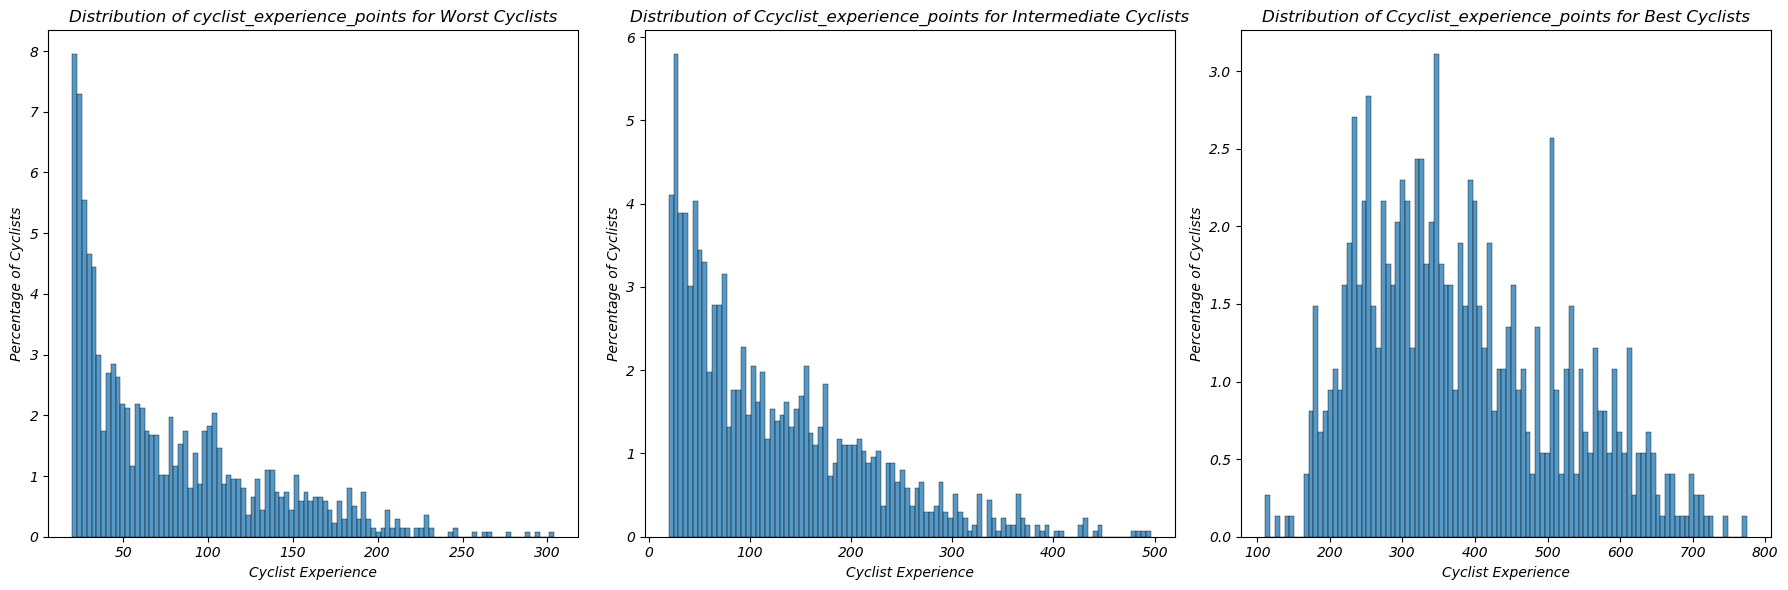

In [59]:
# Plot the normalized distribution of cyclist experience points for all clusters
plt.figure(figsize=(18, 6))

# Plot for worst cyclists
plt.subplot(1, 3, 1)
sns.histplot(clists_2_df['cyclist_experience'], bins=100, stat='percent')
plt.title('Distribution of cyclist_experience_points for Worst Cyclists')
plt.xlabel('Cyclist Experience')
plt.ylabel('Percentage of Cyclists')

# Plot for intermediate cyclists
plt.subplot(1, 3, 2)
sns.histplot(cyclist_0_df['cyclist_experience'], bins=100, stat='percent')
plt.title('Distribution of Ccyclist_experience_points for Intermediate Cyclists')
plt.xlabel('Cyclist Experience')
plt.ylabel('Percentage of Cyclists')

# Plot for best cyclists
plt.subplot(1, 3, 3)
sns.histplot(cyclists_1_df['cyclist_experience'], bins=100, stat='percent')
plt.title('Distribution of Ccyclist_experience_points for Best Cyclists')
plt.xlabel('Cyclist Experience')
plt.ylabel('Percentage of Cyclists')

plt.tight_layout()
plt.show()


Here, we can see that as we move from the cluster of the worst cyclists to the best cyclists, the percentage of cyclists with high experience points increases. This aligns with what we expected from the clusters, confirming that better-performing cyclists tend to have a higher percentage of experience_points.

#### **Characterization based on** ```best_position```

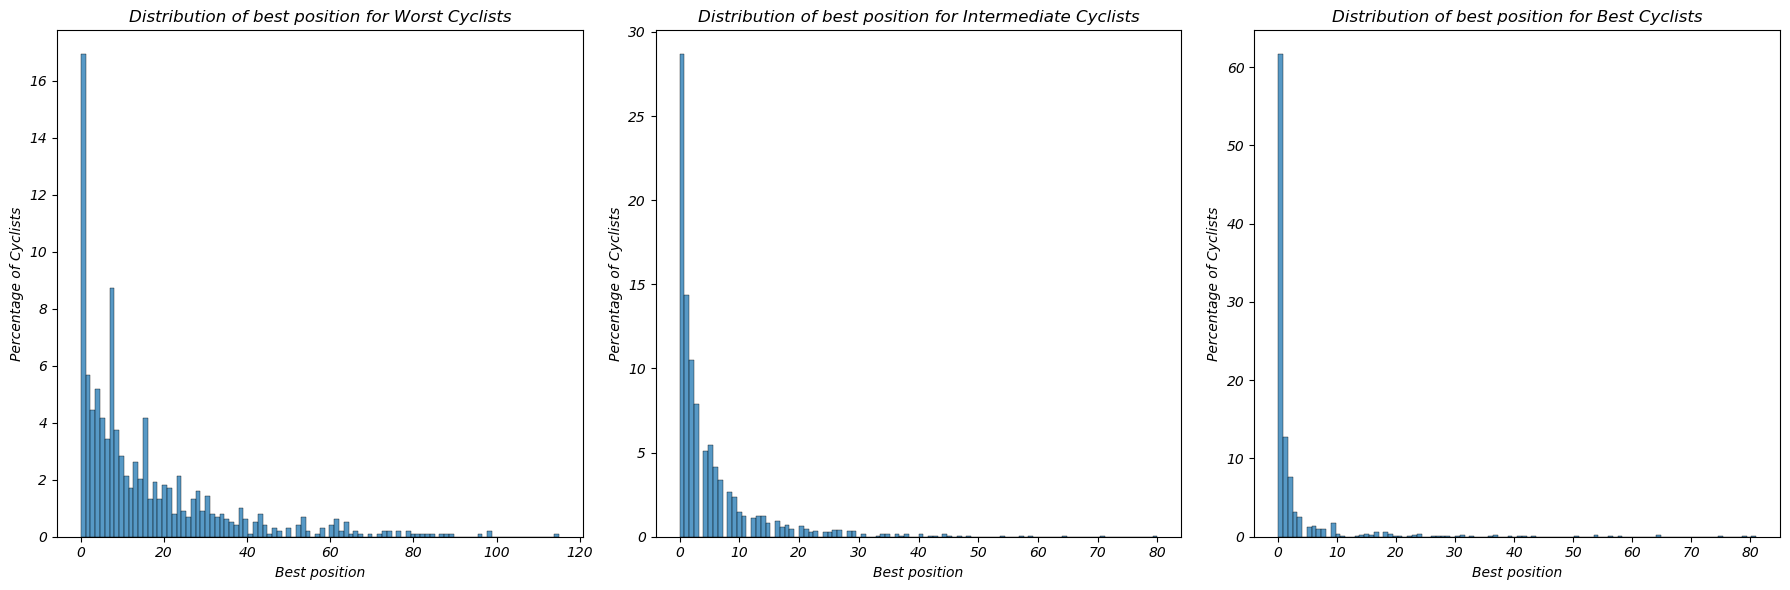

In [30]:
# Plot the distribution of best_position for all clusters
plt.figure(figsize=(18, 6))

# Plot for worst cyclists
plt.subplot(1, 3, 1)
sns.histplot(clists_2_df['best_position'], bins=100, stat='percent')
plt.title('Distribution of best position for Worst Cyclists')
plt.xlabel('Best position')
plt.ylabel('Percentage of Cyclists')

# Plot for intermediate cyclists
plt.subplot(1, 3, 2)
sns.histplot(cyclist_0_df['best_position'], bins=100, stat='percent')
plt.title('Distribution of best position for Intermediate Cyclists')
plt.xlabel('Best position')
plt.ylabel('Percentage of Cyclists')

# Plot for best cyclists
plt.subplot(1, 3, 3)
sns.histplot(cyclists_1_df['best_position'], bins=100, stat='percent')
plt.title('Distribution of best position for Best Cyclists')
plt.xlabel('Best position')
plt.ylabel('Percentage of Cyclists')

plt.tight_layout()
plt.show()

Here, we can notice that as we move from the cluster of the worst cyclists to the best cyclists, the percentage of cyclists who have achieved top positions increases significantly, while the percentage of those who have achieved poor positions decreases.

#### **Characterization based on** ```performance_entropy```

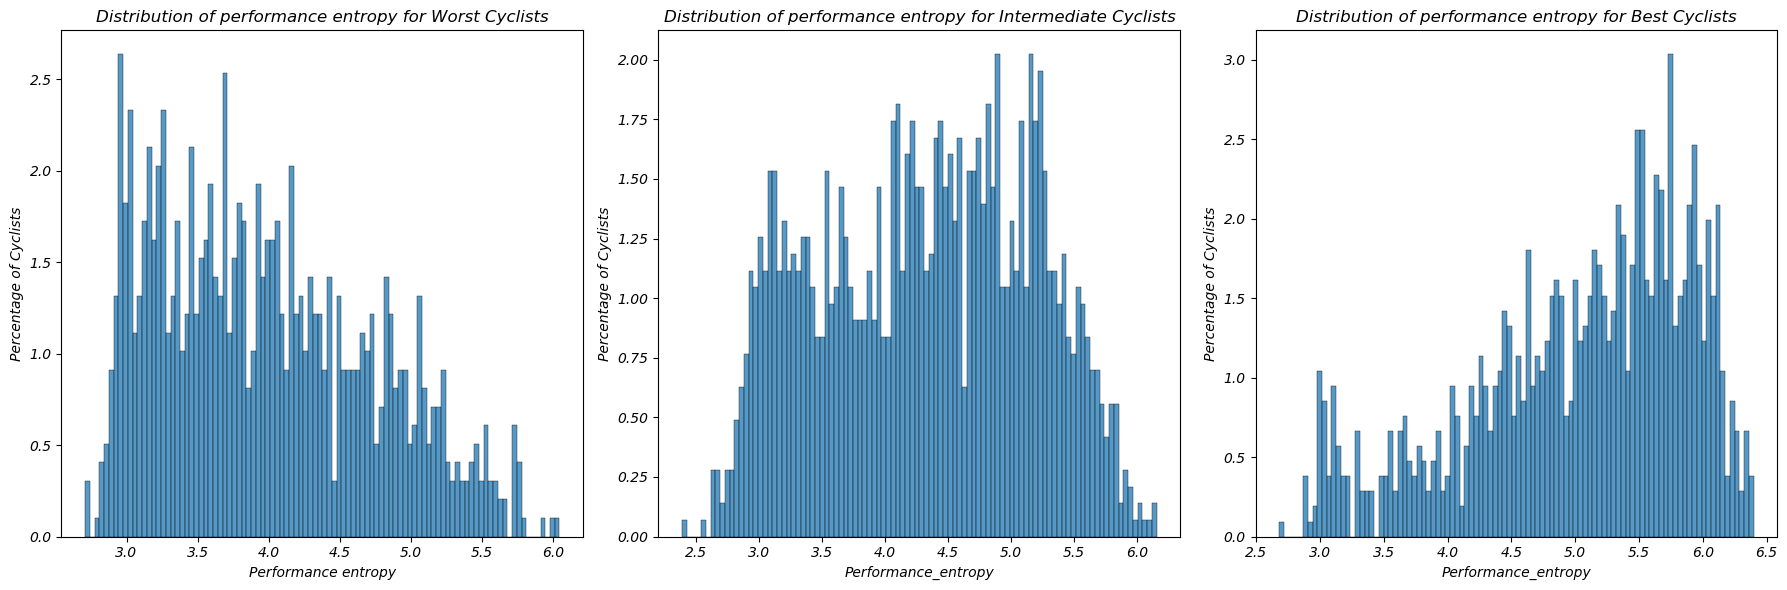

In [31]:
plt.figure(figsize=(18, 6))

# Plot for worst cyclists
plt.subplot(1, 3, 1)
sns.histplot(clists_2_df['performance_entropy'], bins=100, stat='percent')
plt.title('Distribution of performance entropy for Worst Cyclists')
plt.xlabel('Performance entropy')
plt.ylabel('Percentage of Cyclists')

# Plot for intermediate cyclists
plt.subplot(1, 3, 2)
sns.histplot(cyclist_0_df['performance_entropy'], bins=100, stat='percent')
plt.title('Distribution of performance entropy for Intermediate Cyclists')
plt.xlabel('Performance_entropy')
plt.ylabel('Percentage of Cyclists')

# Plot for best cyclists
plt.subplot(1, 3, 3)
sns.histplot(cyclists_1_df['performance_entropy'], bins=100, stat='percent')
plt.title('Distribution of performance entropy for Best Cyclists')
plt.xlabel('Performance_entropy')
plt.ylabel('Percentage of Cyclists')

plt.tight_layout()
plt.show()

Here we observe a trend that might seem counterintuitive as the percentage of cyclists with higher performance entropy increases slightly as we move from the worst to the best cyclists. This happens because in this clustering cyclists with many races are rewarded which inevitably leads to more inconsistent results as they have participated in many races including high-level ones. On the other hand, cyclists considered to be of a lower level may have fewer races, resulting in a more regular performance probably without significant peaks. 

### **CONCLUSION CLUSTER 1** <br>

The identified clusters show distributions of features that can indicate a cyclist’s skill level, as we expected. Therefore we can confirm that K-means identifies clusters based on a cyclist’s skill level.

This level depends on good placements in races, considering the importance of the competitions but not only that. By including career level it was possible to identify a level that takes into account not only good results but also how active a cyclist has been throughout their career.

As a result a cyclist who has participated in only a few races and won them all is not necessarily classified as a cyclist of high level. This happens because a low career level considers the number of races completed and the accumulated score, which is also weighted by the importance of the competitions. (For example, participating in 100 low-level races is not the same as competing in 100 high-level races).

### Summary
- **Best Cyclists cluster**: Cyclists who achieved excellent average results, with many podiums and extensive experience in high-level races.
- **Intermediate Cyclists cluster**: Cyclists with a good number of races and discrete average results, with experience in medium-level races.
- **Worst Cyclists cluster**: Cyclists who achieved generally poor results in low-level races and have limited experience.

----

## **CLUSTER 2**
feature used: 
- `avg_relative_position`
- `career_level`
- `mean_last_20_positions`

In this cluster, we decided to add a feature, compared to the first one, that indicates how badly a cyclist has performed over the course of his or her career. This allows us to consider not only the features that show good performance, but also those that show the worst performance.

### **Preprocessing**

Only numerical features are kept for k-means

In [32]:
# best caratterizzation but sub optimal separation
columns_to_keep = ["avg_relative_position", "mean_last_20_positions_1","career_level"]

In [33]:
numeric_cyclists_df = cyclists_df[cyclists_df[columns_to_keep].select_dtypes(include=[np.number]).columns]
numeric_cyclists_df

,avg_relative_position,mean_last_20_positions_1,career_level
0,0.004726,0.011732,14371.866873
1,0.010415,0.015631,1514.222579
2,0.007259,0.015576,8115.442081
3,0.009004,0.015483,1673.263534
4,0.008623,0.020575,11460.308567
...,...,...,...
3471,0.005587,0.015920,13654.562144
3472,0.007723,0.012893,2179.182843
3473,0.006247,0.006830,858.492493
3474,0.012301,0.015167,787.168167


Standardize cyclists_df by scaling each feature to have a mean of 0 and a standard deviation of 1.

In [34]:
scaler = StandardScaler()
scaler.fit(numeric_cyclists_df)
scaled_cyclists = scaler.transform(numeric_cyclists_df)

### **Best K parameter search**

In [35]:
k_grid = range(2, 21)

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(scaled_cyclists)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels
    
    print(f'for k = {k}')
    print('SSE %s' % sse)
    current_bouldin = davies_bouldin_score(scaled_cyclists, labels)
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    current_silhouette = silhouette_score(scaled_cyclists, labels)
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)
    

for k = 2
SSE 6922.754796549031
Separation 1.1429848790390562
Silhouette 0.3553986277371246
for k = 3
SSE 3880.849624143577
Separation 0.8276967594560182
Silhouette 0.4136518457549418
for k = 4
SSE 3098.202625773734
Separation 0.9273816213342068
Silhouette 0.38136375328779115
for k = 5
SSE 2566.6069314262277
Separation 0.9345811821233658
Silhouette 0.3386202335558759
for k = 6
SSE 2158.664312481021
Separation 0.8767255242488498
Silhouette 0.33913780871060184
for k = 7
SSE 1904.2206630275346
Separation 0.9049015393528496
Silhouette 0.33065821569166465
for k = 8
SSE 1711.7915862011325
Separation 0.9158342773724679
Silhouette 0.31883876186773646
for k = 9
SSE 1532.5644861494102
Separation 0.875345044576142
Silhouette 0.3231083542743181
for k = 10
SSE 1391.6832428483915
Separation 0.8863046468198494
Silhouette 0.31797194022146735
for k = 11
SSE 1279.3445730690285
Separation 0.8851438989881036
Silhouette 0.3212150174932612
for k = 12
SSE 1191.3588091853512
Separation 0.8868889952277829
Silh

#### **SSE**

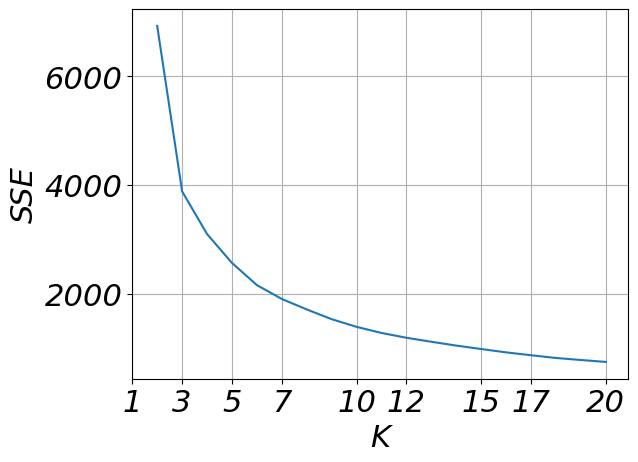

In [36]:
sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()


For K=3, appears to be the first point at which the rate of decrease in the curve decreases

#### **Silhouette**

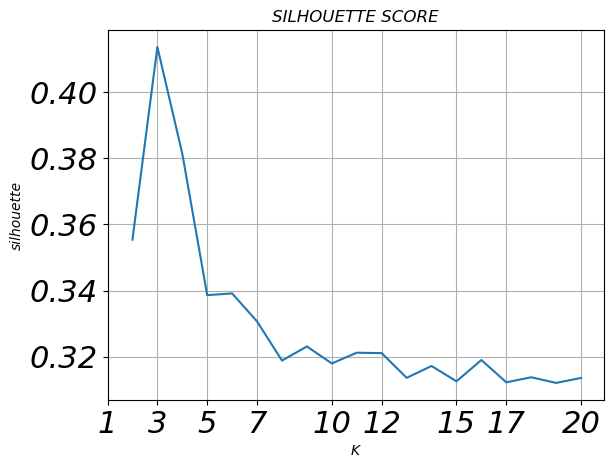

In [37]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

Silhouette reaches a maximum value in k=3

#### **Dvies-Bouldin**

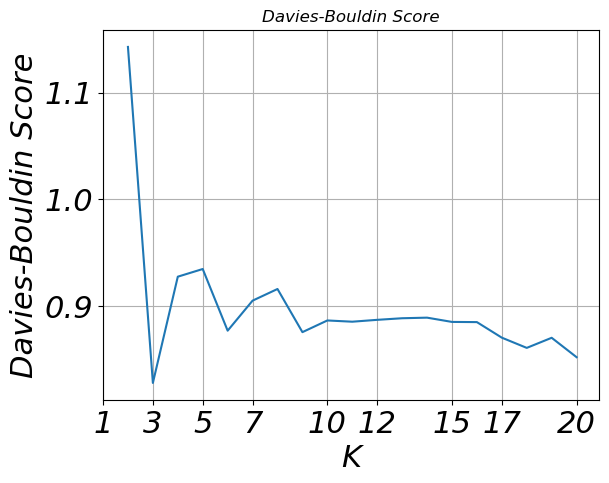

In [38]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

obg = {"timestamp": "2021-06-07T15:00:00Z", }

In this case the best value is with k=3 

**Best k conclusion:**<br>
Considering the three metrics, the value of K=3 emerges as the best choice, as it represents a compromise that aligns well with all the evaluated metrics. 

### **K-means resuslts**


Considering the three metrics, the value of K=3 emerges as the best choice, as it represents a compromise that aligns well with all the evaluated metrics.

In [39]:
#RETRAIN BEST K-MEANS
best_k = 3
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=100)
best_kmeans.fit(scaled_cyclists)

KMeans(max_iter=100, n_clusters=3, random_state=0)

#### **PCA**

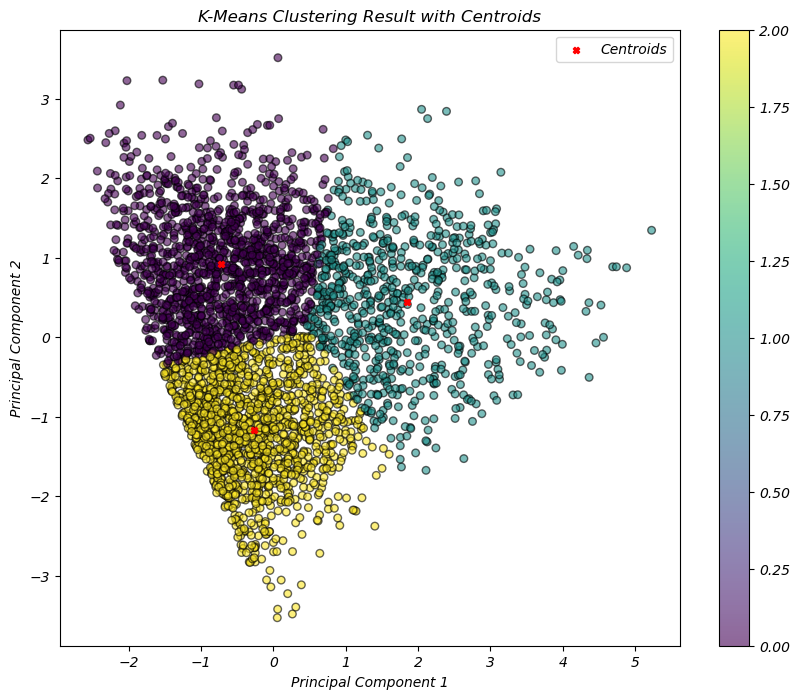

In [40]:
# Reduce the dimensionality of the data to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_cyclists)

# Plot the centroids in 2D
centroids_pca = pca.transform(best_kmeans.cluster_centers_)

plt.figure(figsize=(10, 8))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=30, alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=20, label='Centroids')
plt.title('K-Means Clustering Result with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(sc)
plt.legend()
plt.show()

In [41]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [1364, 740, 1372]


#### **Pari plot**

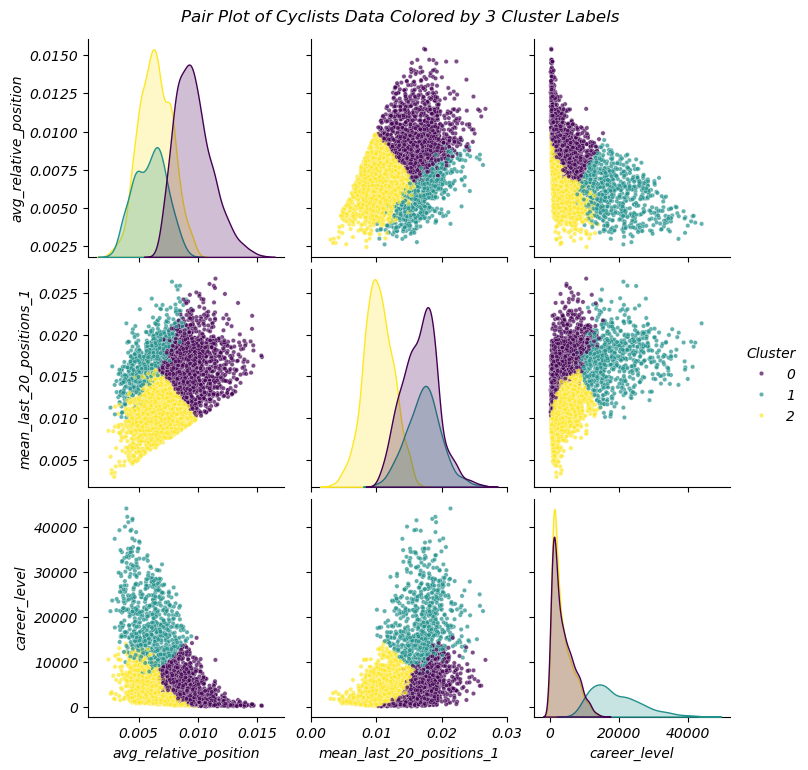

In [42]:
# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

cyclists_df = cyclists_df.assign(Cluster=labels_series.values)

# Pair plot colored by cluster labels with smaller markers
sns.pairplot(numeric_cyclists_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis', markers='o', plot_kws={'s': 10, 'alpha': 0.7})
plt.suptitle(f'Pair Plot of Cyclists Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()



#### **Similarity Plot**

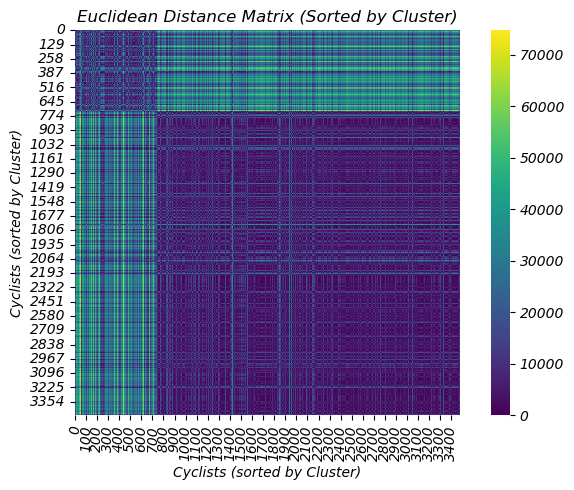

In [43]:
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# order the dataframe based on the cluster
cyclists_df['Cluster'] = pd.Categorical(cyclists_df['Cluster'], categories=[1, 0, 2], ordered=True)
cyclists_df_sorted = cyclists_df.sort_values(by='Cluster')

# calculate the euclidean distance matrix excluding the cluster value
features = cyclists_df_sorted.drop(columns=['Cluster']).select_dtypes(include=[np.number])
distance_matrix = euclidean_distances(features)

# visualize the distance matrix
plt.figure(figsize=(8, 5))
sns.heatmap(distance_matrix, cmap='viridis', square=True)
plt.title('Euclidean Distance Matrix (Sorted by Cluster)')
plt.xlabel('Cyclists (sorted by Cluster)')
plt.ylabel('Cyclists (sorted by Cluster)')
plt.show()


#### **Pie chart**

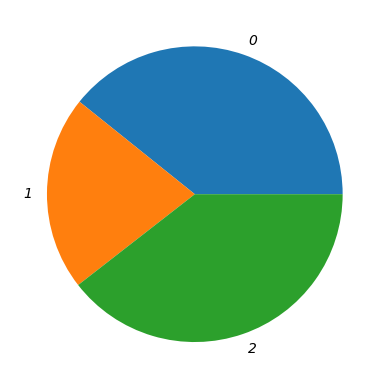

In [44]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

#### **Radar plot**

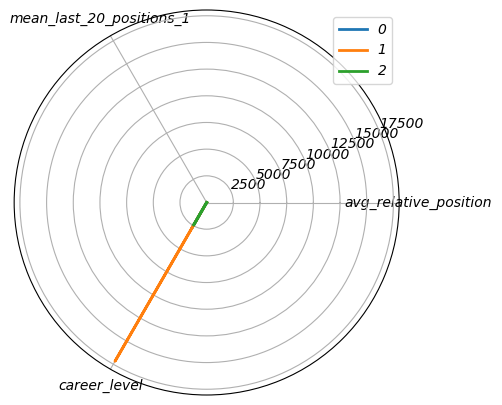

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(numeric_cyclists_df.columns)
plt.figure(figsize=(5, 5))

for k in range(0, n_clusters):
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
     
    values = numeric_cyclists_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], numeric_cyclists_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()

### **Cluster Characterization**

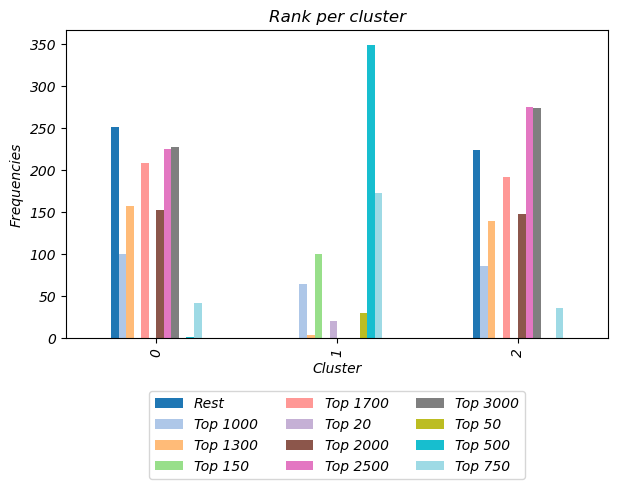

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, cyclists_df['top_cyclists'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()


The plot didn’t turn out as we expected. In fact, the clusters are not clearly separated based on *career level*.

- **Cluster 1**: Represents cyclists with a relatively higher *career level*. This is the only cluster that includes top 20, top 50 and top 150 cyclists career level.  

- **Cluster 0**: Corresponds to intermediate *career level* cyclists. Compared to Cluster 2, it includes some top 500 cyclists, which are absent in Cluster 2.  

- **Cluster 2**: Contains cyclists with the lowest *career level*. This is evident from the significant presence of the "rest" category, meaning those with the lowest rankings.

As mentioned, this characterization isn’t entirely accurate. Upon reviewing the process, this makes sense because the clusters are based on a combination of features: *career level*, *average position*, and *mean least 20 position*. 

The clustering “level” found by K-means is therefore a combination of these three features, not just *career level*. Consequently, it’s reasonable that the clusters aren’t perfectly characterized by *career level* alone.


**More precise visualization**

Starting with the graph shown above, we now perform the same analysis, but with a division into classes based on the clustering results. The first class (representing the strongest cyclists) should include the top 1055 cyclists based on career level. The second class (intermediate cyclists) includes cyclists ranked from position 1055 to 2489 (the next 1434 cyclists). Finally, the remaining cyclists from position 1294 onward form the third class.

In [47]:
# Sort the cyclists_df DataFrame by the 'career_level' column in descending order
sorted_cyclists_df = cyclists_df.sort_values(by='career_level', ascending=False)
[1364, 740, 1372]

bins = [0, 740, 2104, 3476 ]
labels = ['top '+ str(bins[1]), 'top '+ str(bins[2]), 'top '+ str(bins[3])]

# Create a new column 'career_level_category' based on the bins
sorted_cyclists_df['top_cyclists3'] = pd.cut(range(1, len(sorted_cyclists_df) + 1), bins=bins, labels=labels, right=False)


# Add the 'top_cyclists' column to the original cyclists_df
cyclists_df = cyclists_df.merge(sorted_cyclists_df[['_url', 'top_cyclists3']], on='_url', how='left')

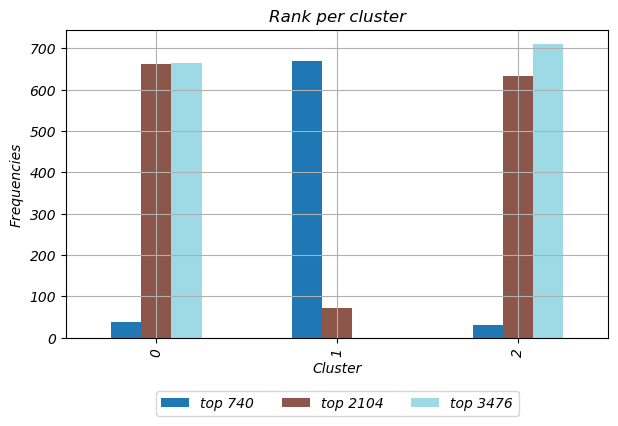

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, cyclists_df['top_cyclists3'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Aggiungere più intervalli sull'asse y
ax.set_yticks(range(0, rank_xt_pct.values.max() + 1, 100))

# Aggiungere la griglia
ax.grid(True)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()

#### **Parallel Coordinates Plot for Centroids**

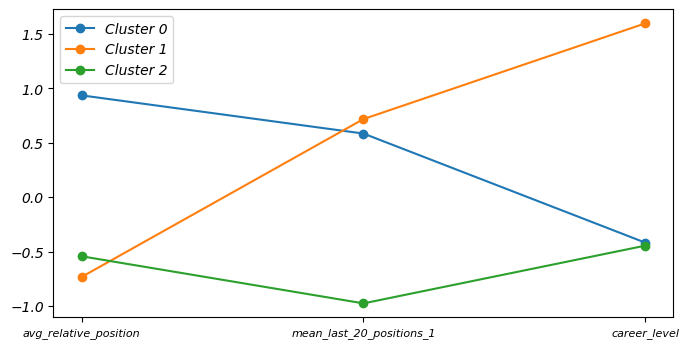

In [49]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8, 4))
centers = best_kmeans.cluster_centers_
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(columns_to_keep)), columns_to_keep, fontsize=8)
plt.legend(fontsize=10)
plt.show()

Looking at this plot, we can already see several problems that make interpretation difficult. If we compare cluster 2 and cluster 0, we observe that cluster 2 has a significantly higher mean relative position (relative position) and mean_last_20_position than cluster 0. Despite this, their career levels (career level) are almost equal. 

**IMPORTANT** In this case, it was not possible to classify cyclists based on their level from the beginning, as happened in the first clustering. As a result, no initial hypothesis could be made or confirmed by analyzing distributions. To reach conclusions, it was necessary to examine the overall results. (The analyses are all in the final part of the notebook)



In [50]:
cluster_labels = {0: '0', 1: '1', 2: '2'}

In [51]:
# filter the dataframe for each cluster value
cyclists_1_df = cyclists_df[cyclists_df['Cluster'] == 1]
cyclist_0_df = cyclists_df[cyclists_df['Cluster'] == 0]
clists_2_df = cyclists_df[cyclists_df['Cluster'] == 2]

#### **Analysis on the feature used for clustering** ```avg_relative_position```, ```career_level```, ```mean_last_20_positions_1```

In [52]:
# --- AVG RELATIVE POSITION ---

mean_avg_relative_position_per_cluster = cyclists_df.groupby('Cluster')['avg_relative_position'].mean()

# Print the mean avg_relative_position for each cluster with custom labels
for cluster, mean_avg_relative_position in mean_avg_relative_position_per_cluster.items():
    print(f'{cluster_labels[cluster]}: Mean Avg Relative Position = {mean_avg_relative_position}')

1: Mean Avg Relative Position = 0.00597439017775384
0: Mean Avg Relative Position = 0.009643095982739056
2: Mean Avg Relative Position = 0.006402931644676201


C:\Users\franc\AppData\Local\Temp\ipykernel_6968\3658375086.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_avg_relative_position_per_cluster = cyclists_df.groupby('Cluster')['avg_relative_position'].mean()


In [53]:
# --- CAREER LEVEL ---

mean_wins_per_cluster = cyclists_df.groupby('Cluster')['career_level'].mean()
# Print the mean number of cyclist wins for each cluster with custom labels
for cluster, mean_wins in mean_wins_per_cluster.items():
    print(f'Cluster {cluster_labels[cluster]}: Mean Cyclist career level = {mean_wins}')

Cluster 1: Mean Cyclist career level = 18837.076191892567
Cluster 0: Mean Cyclist career level = 3729.578087954827
Cluster 2: Mean Cyclist career level = 3501.81455204763


C:\Users\franc\AppData\Local\Temp\ipykernel_6968\3949613612.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_wins_per_cluster = cyclists_df.groupby('Cluster')['career_level'].mean()


In [54]:
# --- MEAN LAST 20 POSITION ---

mean_wins_per_cluster = cyclists_df.groupby('Cluster')['mean_last_20_positions_1'].mean()
# Print the mean number of cyclist wins for each cluster with custom labels
for cluster, mean_wins in mean_wins_per_cluster.items():
    print(f'Cluster {cluster_labels[cluster]}: Mean Cyclist last 20 position = {mean_wins}')

Cluster 1: Mean Cyclist last 20 position = 0.01722079336821617
Cluster 0: Mean Cyclist last 20 position = 0.016698997970121116
Cluster 2: Mean Cyclist last 20 position = 0.010259549944710476


C:\Users\franc\AppData\Local\Temp\ipykernel_6968\4294833466.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_wins_per_cluster = cyclists_df.groupby('Cluster')['mean_last_20_positions_1'].mean()


As expected, for all three features, the average values are better for the stronger clusters and worse for the weaker ones.

#### **Characterization based on** ```weighted_podiums```

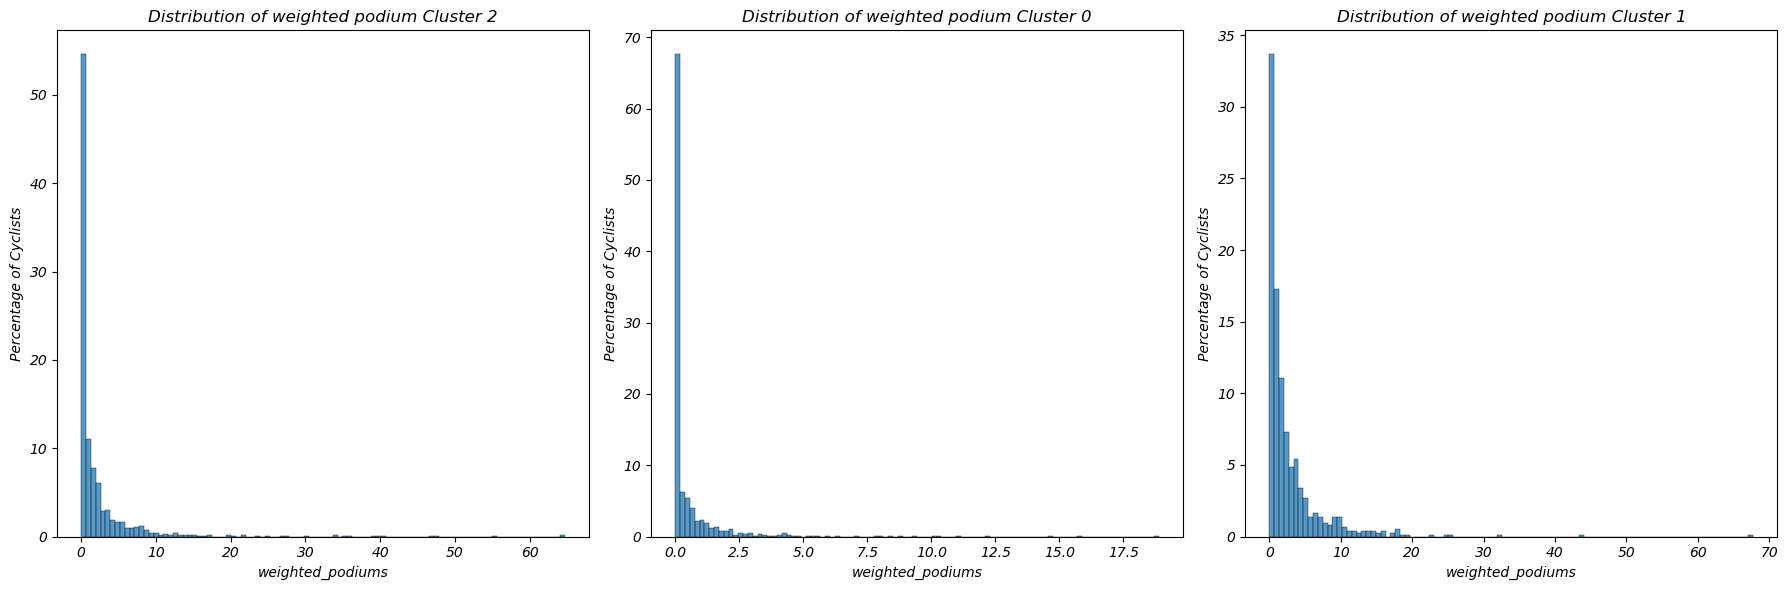

In [55]:
# Plot the distribution of stages won for all clusters
plt.figure(figsize=(18, 6))

# Plot for worst cyclists
plt.subplot(1, 3, 1)
sns.histplot(clists_2_df['weighted_podiums'], bins=100, stat='percent')
plt.title('Distribution of weighted podium Cluster 2')
plt.xlabel('weighted_podiums')
plt.ylabel('Percentage of Cyclists')

# Plot for intermediate cyclists
plt.subplot(1, 3, 2)
sns.histplot(cyclist_0_df['weighted_podiums'], bins=100, stat='percent')
plt.title('Distribution of weighted podium Cluster 0')
plt.xlabel('weighted_podiums')
plt.ylabel('Percentage of Cyclists')

# Plot for best cyclists
plt.subplot(1, 3, 3)
sns.histplot(cyclists_1_df['weighted_podiums'], bins=100, stat='percent')
plt.title('Distribution of weighted podium Cluster 1')
plt.xlabel('weighted_podiums')
plt.ylabel('Percentage of Cyclists')

plt.tight_layout()
plt.show()

#### **Characterization based on** ```cyclist_experience```

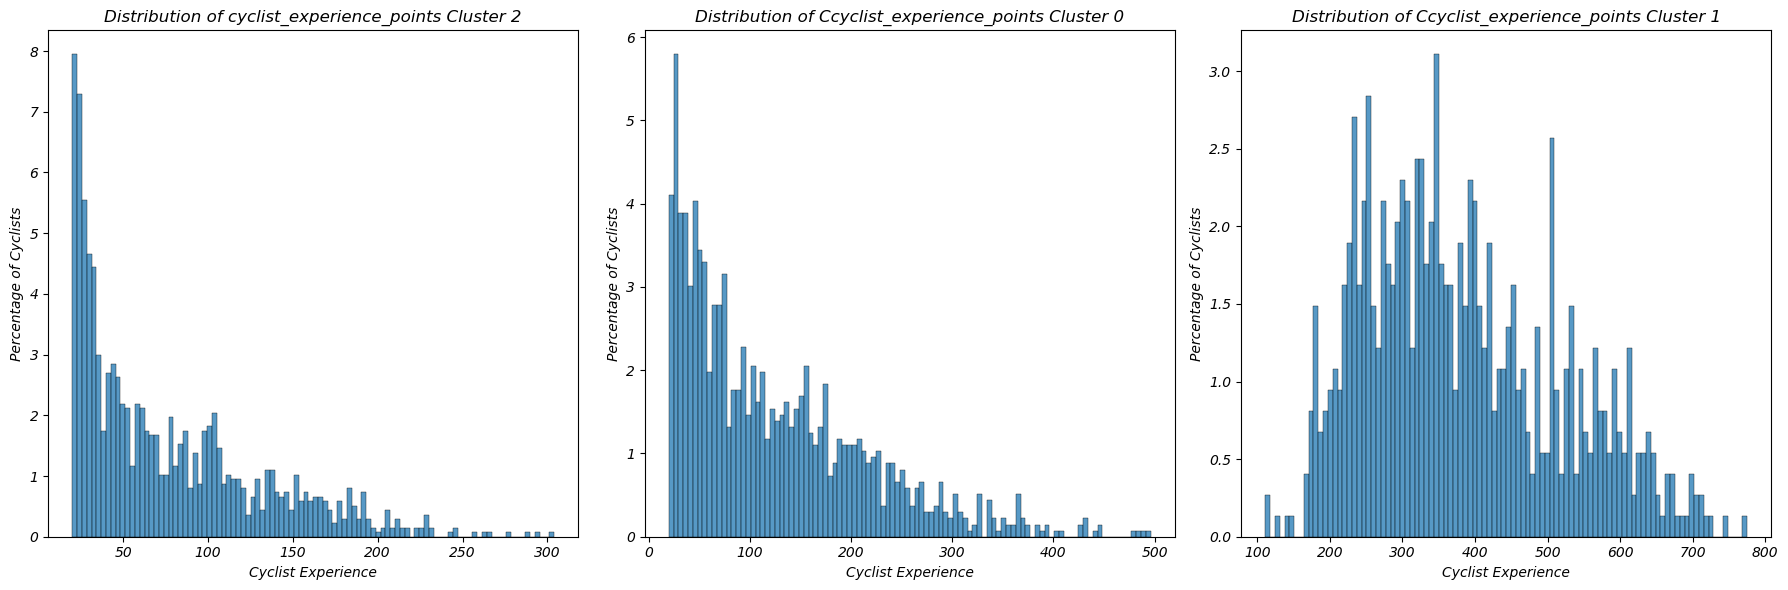

In [56]:
# Plot the normalized distribution of cyclist experience points for all clusters
plt.figure(figsize=(18, 6))

# Plot for worst cyclists
plt.subplot(1, 3, 1)
sns.histplot(clists_2_df['cyclist_experience'], bins=100, stat='percent')
plt.title('Distribution of cyclist_experience_points Cluster 2')
plt.xlabel('Cyclist Experience')
plt.ylabel('Percentage of Cyclists')

# Plot for intermediate cyclists
plt.subplot(1, 3, 2)
sns.histplot(cyclist_0_df['cyclist_experience'], bins=100, stat='percent')
plt.title('Distribution of Ccyclist_experience_points Cluster 0')
plt.xlabel('Cyclist Experience')
plt.ylabel('Percentage of Cyclists')

# Plot for best cyclists
plt.subplot(1, 3, 3)
sns.histplot(cyclists_1_df['cyclist_experience'], bins=100, stat='percent')
plt.title('Distribution of Ccyclist_experience_points Cluster 1')
plt.xlabel('Cyclist Experience')
plt.ylabel('Percentage of Cyclists')

plt.tight_layout()
plt.show()


#### **Characterization based on** ```best_position```

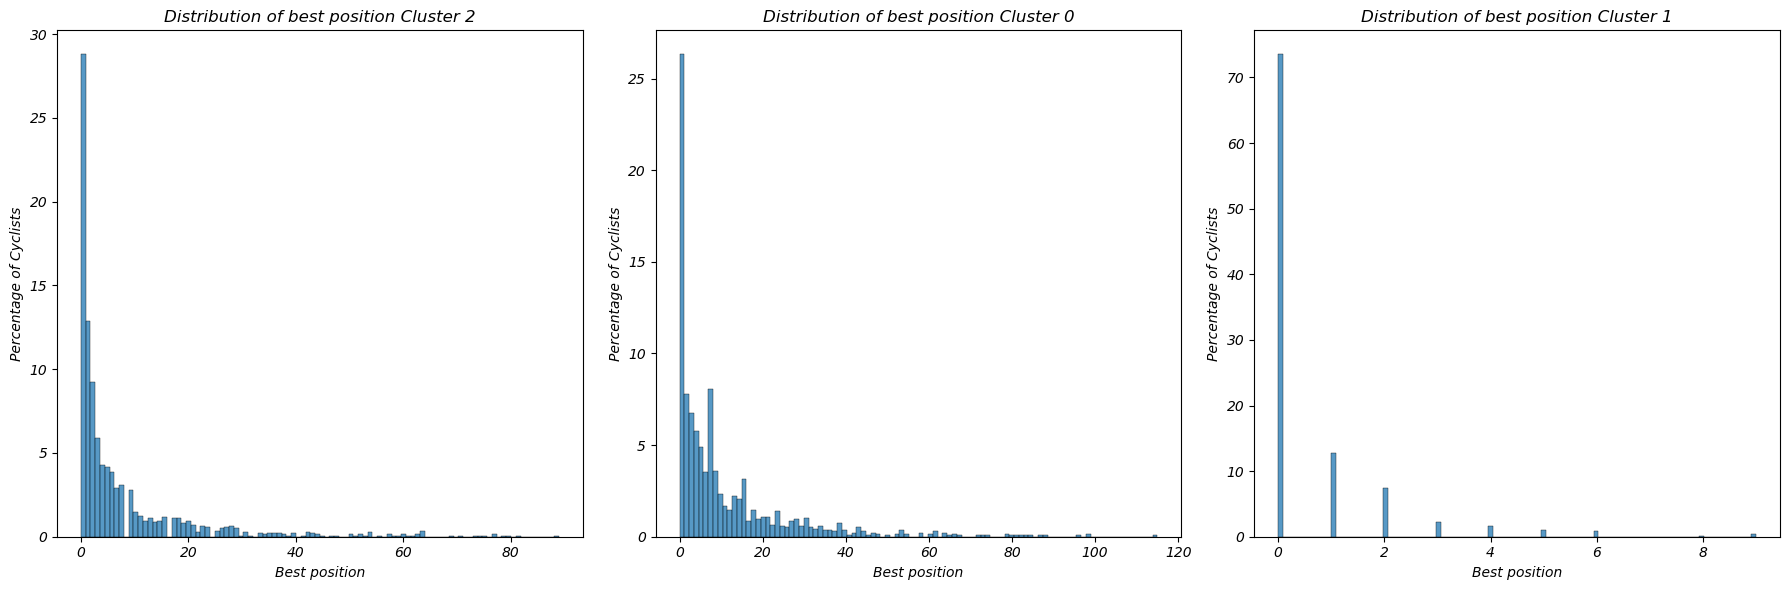

In [57]:
# Plot the distribution of best_position for all clusters
plt.figure(figsize=(18, 6))

# Plot for worst cyclists
plt.subplot(1, 3, 1)
sns.histplot(clists_2_df['best_position'], bins=100, stat='percent')
plt.title('Distribution of best position Cluster 2')
plt.xlabel('Best position')
plt.ylabel('Percentage of Cyclists')

# Plot for intermediate cyclists
plt.subplot(1, 3, 2)
sns.histplot(cyclist_0_df['best_position'], bins=100, stat='percent')
plt.title('Distribution of best position Cluster 0')
plt.xlabel('Best position')
plt.ylabel('Percentage of Cyclists')

# Plot for best cyclists
plt.subplot(1, 3, 3)
sns.histplot(cyclists_1_df['best_position'], bins=100, stat='percent')
plt.title('Distribution of best position Cluster 1')
plt.xlabel('Best position')
plt.ylabel('Percentage of Cyclists')

plt.tight_layout()
plt.show()

#### **Characterization based on** ```performance_entropy```

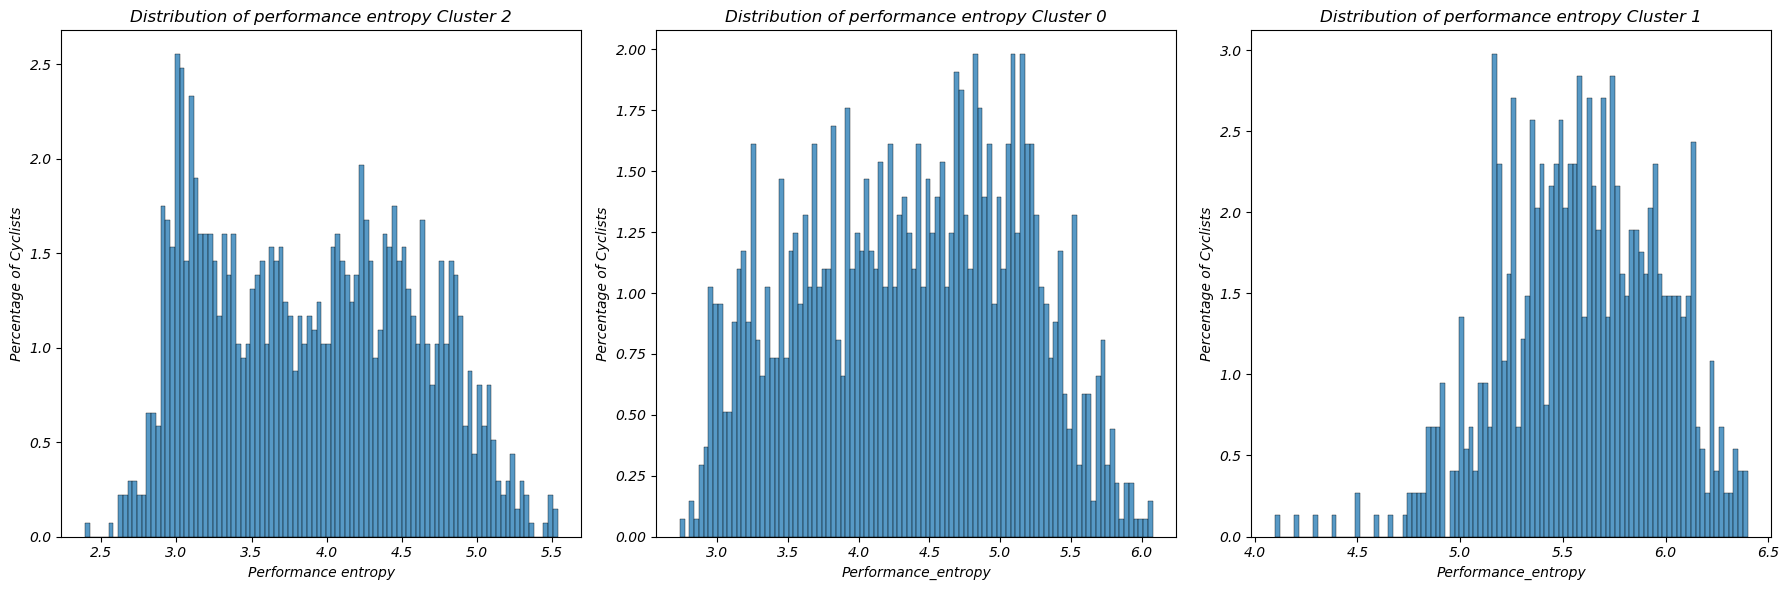

In [58]:
plt.figure(figsize=(18, 6))

# Plot for worst cyclists
plt.subplot(1, 3, 1)
sns.histplot(clists_2_df['performance_entropy'], bins=100, stat='percent')
plt.title('Distribution of performance entropy Cluster 2')
plt.xlabel('Performance entropy')
plt.ylabel('Percentage of Cyclists')

# Plot for intermediate cyclists
plt.subplot(1, 3, 2)
sns.histplot(cyclist_0_df['performance_entropy'], bins=100, stat='percent')
plt.title('Distribution of performance entropy Cluster 0')
plt.xlabel('Performance_entropy')
plt.ylabel('Percentage of Cyclists')

# Plot for best cyclists
plt.subplot(1, 3, 3)
sns.histplot(cyclists_1_df['performance_entropy'], bins=100, stat='percent')
plt.title('Distribution of performance entropy Cluster 1')
plt.xlabel('Performance_entropy')
plt.ylabel('Percentage of Cyclists')

plt.tight_layout()
plt.show()

### **FINAL ANALYSIS K-NN CLUSTER 2** <br>

Looking at the plot of the coordinates and the distribution of features within the clusters, we observe:

1. **Cluster 1**:  
   This is the cluster of the best cyclists. The plots show that these athletes participated in many races, achieving excellent results, with numerous podiums and an average *career level* much higher than the other clusters.  
   One counterintuitive observation is their high *mean_last_20_position*. However, this can be explained by the fact that since these cyclists have competed in many races, they are more likely to have had some underperformances.

2. **Cluster 0**:  
   This cluster includes cyclists who participated in many races but achieved average or below-average results. This is evident from their **high experience** (*cyclist experience*), which reflects a large number of races, but **average ranking not excellent**, as seen in the low values for *weighted podiums* and *avg_realtive_position*.  
   This cluster contains cyclists who did many race but with no so great performance.

3. **Cluster 2**:  
   This cluster contains cyclists who, despite participating in **fewer races**, achieved **better average results** compared to Cluster 0. This can be seen in the higher values for *weighted podiums* and *avg_realtive_position*, as well as the low *mean_last_20_position*. However, these cyclists have less overall experience, as shown by the low values of *cyclist experience*.  



### Summary
- **Cluster 1** clearly represents the best cyclists in terms of experience, results, and career level.  
- **Cluster 0** includes cyclists with a lot of experience but less great results.  
- **Cluster 2** includes cyclists with good average results but limited experience.  